In [2]:
from sklearn.datasets import fetch_openml
from sklearn.linear_model import Perceptron

X = fetch_openml('mnist_784')

In [3]:
X,Y = X.data,X.target

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,shuffle=False)

In [5]:
print(Y_train.iloc[-1])

6


In [6]:
import pandas as pd

In [7]:
X_train_new = pd.concat([X_train[Y_train=='6'],X_train[Y_train=='9']],ignore_index=False)
Y_train_new = pd.concat([Y_train[Y_train=='6'],Y_train[Y_train=='9']],ignore_index=False)
X_test_new = pd.concat([X_test[Y_test=='6'],X_test[Y_test=='9']],ignore_index=False)
Y_test_new = pd.concat([Y_test[Y_test=='6'],Y_test[Y_test=='9']],ignore_index=False)

In [8]:
from sklearn.utils import shuffle
X_train_new = shuffle(X_train_new,random_state=1729)
X_test_new = shuffle(X_test_new,random_state=1729)
Y_train_new = shuffle(Y_train_new,random_state=1729)
Y_test_new = shuffle(Y_test_new,random_state=1729)

In [9]:
Y_train_new.replace('6',1,inplace=True)
Y_train_new.replace('9',0,inplace=True)
Y_test_new.replace('6',1,inplace=True)
Y_test_new.replace('9',0,inplace=True)

/tmp/ipykernel_5326/3853957848.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  Y_train_new.replace('6',1,inplace=True)
/tmp/ipykernel_5326/3853957848.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  Y_train_new.replace('9',0,inplace=True)
/tmp/ipykernel_5326/3853957848.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  Y_test_new.replace('6',1,i

In [10]:
import numpy as np
print(np.array(Y_train_new).sum())
print(np.array(Y_test_new).sum())

4855
2021


In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_tf = sc.fit_transform(X_train_new)

In [12]:
print(X_train_tf[:,0].std())

0.0


In [13]:
print(np.mean(X_train_tf[0]))

0.08128379559427992


In [14]:
Y_train_new = Y_train_new.astype(int)

/home/om/Documents/Codes/venv/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/om/Documents/Codes/venv/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/om/Documents/Codes/venv/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/om/Documents/Codes/venv/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.wa

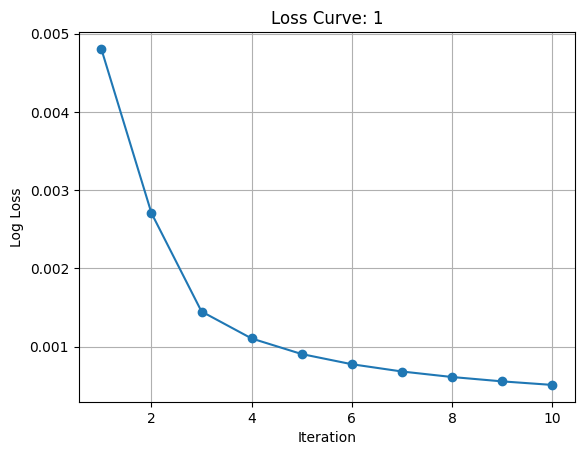

[0.004805694465800076,
 0.0027075473914506504,
 0.0014486912217035188,
 0.0011039293517647985,
 0.000904617212545461,
 0.0007745525693452645,
 0.0006816283932339972,
 0.0006111814728430301,
 0.0005554752798147487,
 0.0005100674372193033]

In [15]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

def train_and_plot(X, y, learning_rate='constant', eta0=0.01,power_t=0.5, title=""):

    clf = SGDClassifier(
        loss='log_loss',
        penalty=None,
        learning_rate=learning_rate,
        eta0=eta0,
        power_t=power_t,
        random_state=10,
        max_iter=1,
        warm_start=True,
    )

    losses = []
    for i in range(10):  # Manual 10 iterations
        clf.fit(X, y)
        y_proba = clf.predict_proba(X)
        loss = log_loss(y, y_proba)
        losses.append(loss)

    plt.plot(range(1, 11), losses, marker='o', label=title)
    plt.xlabel('Iteration')
    plt.ylabel('Log Loss')
    plt.title(f'Loss Curve: {title}')
    plt.grid(True)
    plt.show()

    return losses

train_and_plot(X_train_tf,Y_train_new,title="1")

/home/om/Documents/Codes/venv/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/om/Documents/Codes/venv/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/om/Documents/Codes/venv/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/om/Documents/Codes/venv/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.wa

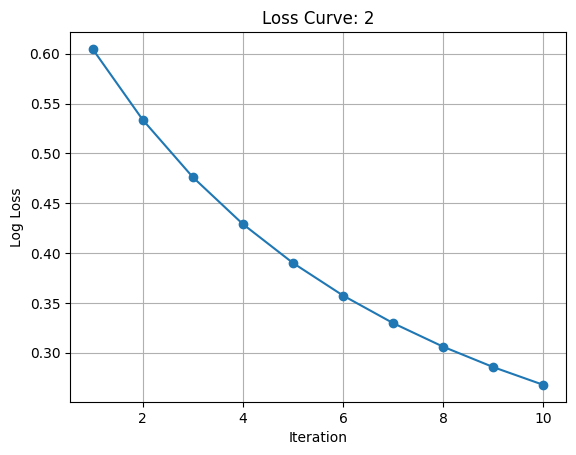

[0.6047730525722791,
 0.5337431448586271,
 0.4761932225201533,
 0.4290754496417377,
 0.390057199479336,
 0.35737527541911024,
 0.32969931108591655,
 0.30602113837713285,
 0.2855707988040756,
 0.2677546416253476]

In [16]:
train_and_plot(X_train_tf,Y_train_new,title="2",eta0=0.000001)

In [17]:
sg = SGDClassifier(penalty=None,eta0=0.5,learning_rate='invscaling',power_t=0.5,shuffle=True,random_state=10)
for i in range(10):
    sg.fit(X_train_tf,Y_train_new)

In [18]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_train_new,sg.predict(X_train_tf))[0][1])

5


In [19]:
Y_train_new.head()

17852    1
8547     0
33615    1
25233    0
25770    1
Name: class, dtype: int64

In [20]:
Y_pred = sg.predict(X_train_new)
for i in range(Y_train_new.shape[0]):
    if Y_train_new.iloc[i]!=Y_pred[i] and Y_pred[i]==1:
        print(i)
        break 

1332


/home/om/Documents/Codes/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SGDClassifier was fitted without feature names
  warnings.warn(


In [43]:
from sklearn.datasets import fetch_20newsgroups
train_data = fetch_20newsgroups(subset='train')

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
x_train_tf = vectorizer.fit_transform(train_data.data)
y_train = train_data.target

In [45]:
print(x_train_tf.shape)

(11314, 130107)


In [46]:
X_train,X_test,Y_train,Y_test = train_test_split(x_train_tf,y_train,test_size=0.3,random_state=0)

In [47]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train,Y_train)
print(nb.score(X_test,Y_test))

0.8427098674521355
